# Odds 

In a binary classification problem, let *p* be the probability of the positive class.

The *odds* is defined as the ratio between the probability of the positive class and the probability of the negative class:

p/(1 - p)

if we plot the odds ratio as a function of *p* we obtain

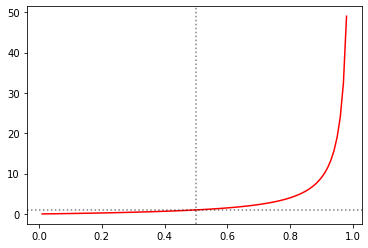

In [1]:
import matplotlib.pyplot as plt
import numpy as np

p = np.arange(0.01, 0.99, 0.01)

odds_ratio = p / (1 - p)

plt.plot(p, odds_ratio, color = "r")
plt.axvline(0.5, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(1.0, color='k', alpha = 0.5, linestyle = ":")

# The Logit function

If we define the *logit* function as the logarithm of the odds (also called log-odds), we obtain:

logit(p) = log(p / (1 - p))

this is a monotonic transformation of the logit function that maps a value in the range between 0 and 1 to R, as shown in the following figure


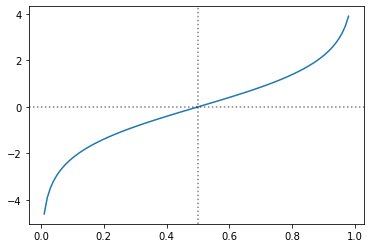

In [2]:
plt.plot(p, np.log(odds_ratio))

plt.axvline(0.5, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(0.0, color='k', alpha = 0.5, linestyle = ":")

# Logistic sigmoid function

If *p* is the probability that an object *x* is classified in the positive class (y = 1), that is p(y = 1 | x), we can use this to express a linear relationship between the logit function and the values of the input x:

logit(p(y = 1 | x)) = w0x0 + w1x1 + w2x2 + ... = w^t x = z

Since we are actually interested in the probability p(y = 1 | x) (and not its logit transformation), we can inverse of the logit function as:

z = log(p / (1 - p))

e^z = p / (1 - p)

(1 - p)e^z = p

e^z = p(1 + e^z)

p = e^z / (1 + e^z)

p = 1 / (1 + e^-z)

We call this function of *z*, Phi(z), the *logistic sigmoid function*:

Phi(z) = 1 / (1 + e^-z)

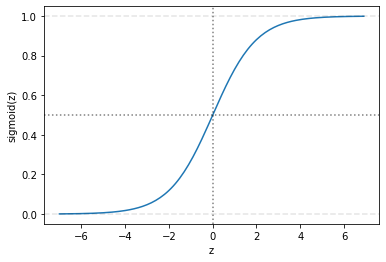

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)

phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(0.5, color='k', alpha = 0.5, linestyle = ":")
#plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')

plt.axhline(1.0, color='k', alpha = 0.1, linestyle = "--")
plt.axhline(0.0, color='k', alpha = 0.1, linestyle = "--")


# Logistic regression

If we plug the sigmoid function Phi(z) at the output of a perceptron, Phi(w^tx), we can obtain the probability that the object x belongs to the positive class.

We can choose (remember the zero-one loss function) to assign the object to class y = 1 when Phi(z) is greater than 0.5 or, alternatively, when z > 0.

## Learning the parameters 



In [86]:
# write your answer here
import numpy as np

# set random seed
#np.random.seed(123)

# generate N points per class
N = 200

# draw samples for X1
X1_1 = np.random.exponential(scale = 5.5, size = N)

X1_2 = np.random.normal(loc = 0.5, scale = 1.5, size = N)

# set labels
y1 = np.ones(N)
y2 = np.zeros(N)

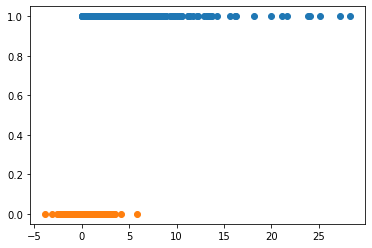

In [88]:
# write your answer here
import matplotlib.pyplot as plt

plt.scatter(X1_1, y1)
plt.scatter(X1_2, y2)

In [89]:
# write your answer here
X = np.stack((np.ones(N * 2),
              np.concatenate((X1_1, X1_2))), 
             axis = 1)

y = np.concatenate((y1, y2))

In [92]:
# write your answer here
# generate w_0,....,w_n
w = np.random.randn(2)

# set learning rate 
eta = 1e-3

# set mini-batch size
batch_size = 20

# set max epochs
max_epochs = 1000

# set errors per epoch
errors_epoch = np.zeros(max_epochs)

# start training
for epochs in range(max_epochs):
    
    # output
    linreg_output = sigmoid(np.dot(X, w))

    # compute quantity of loss
    cost = (-y.dot(np.log(linreg_output)) - ((1 - y).dot(np.log(1 - linreg_output))))

    errors_epoch[epochs] = cost
    
    # compute (quantity) of error
    errors = (y - linreg_output)
    
    # generate random permutation for stochastic gradient descent
    rand_perm = np.random.permutation(range(y.shape[0]))
    X = X[rand_perm, :]
    y = y[rand_perm]
    
    # mini-batch learning
    for j in range(0, y.shape[0], batch_size):
        
        X_batch = X[j:(j + batch_size), :]
        
        y_batch = y[j:(j + batch_size)]
        
        # output
        linreg_output = sigmoid(np.dot(X_batch, w))
        
        errors = (y_batch - linreg_output)
        
        w = w + eta * np.dot(np.transpose(X_batch), errors)    



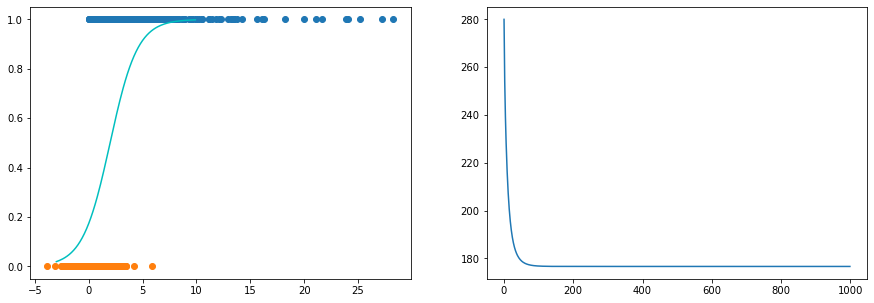

In [93]:
# write your answer here
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

axs[0].scatter(X1_1, y1)
axs[0].scatter(X1_2, y2)
#plt.scatter(X1_1, y1)
#plt.scatter(X1_2, y2)

zz = np.arange(-3, 10, 0.1)

# write your answer here
xx = np.stack((np.ones(len(zz)),
              zz), 
              axis = 1)


axs[0].plot(zz, sigmoid(np.dot(xx, w)), c = "c")


axs[1].plot(range(max_epochs), errors_epoch)